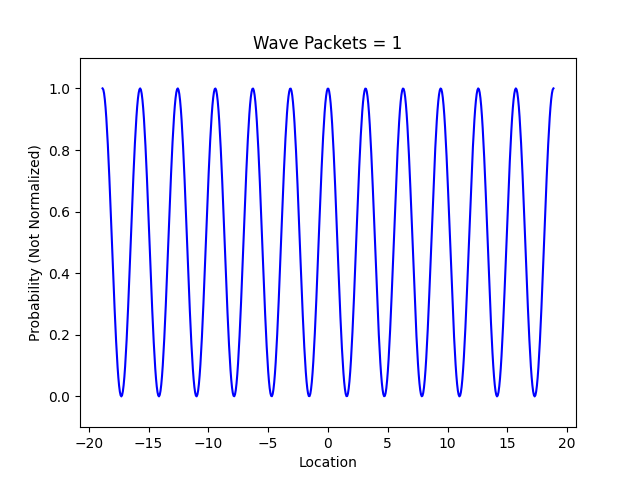

/Users/noahchampagne/miniconda3/envs/qis101/lib/python3.9/site-packages/matplotlib/animation.py:1740: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


In [1]:
"""wave_packet.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

if typing.TYPE_CHECKING:
    from typing import Generator

    from matplotlib.axes import Axes
    from matplotlib.lines import Line2D
    from numpy.typing import NDArray

%matplotlib widget

num_total_waves: int = 1

xa: NDArray[np.float_]
ya: NDArray[np.float_]
wave_data: NDArray[np.float_]
wave_packet: Line2D
cur_wave_num: int
ax: Axes


def plot() -> None:
    global xa, ya, cur_wave_num, wave_data, wave_packet

    xa = np.linspace(-6 * np.pi, 6 * np.pi, 600, dtype=np.float_)

    wave_data = np.empty((num_total_waves * 2, 600), dtype=np.float_)

    for i in range(0, num_total_waves * 2):
        f: float = 2 * (i / num_total_waves - 0.5)
        wave_data[i] = np.cos(f * xa) ** 2

    cur_wave_num = 1
    ya = np.sum(wave_data[:cur_wave_num], axis=0) / (cur_wave_num)
    (wave_packet,) = ax.plot(xa, ya, color="blue")

    ax.set_title(f"Wave Packets = {cur_wave_num}")
    ax.set_xlabel("Location")
    ax.set_ylabel("Probability (Not Normalized)")
    ax.set_ylim(-0.1, 1.1)


def anim_frame_counter() -> Generator[int, None, None]:
    global cur_wave_num
    while cur_wave_num < num_total_waves:
        cur_wave_num += 1
        yield cur_wave_num


def anim_draw_frame(n: int) -> tuple[Line2D]:
    global ax, ya, wave_packet
    ya = np.sum(wave_data[:cur_wave_num], axis=0) / (cur_wave_num)
    wave_packet.set_data(xa, ya)
    ax.set_title(f"Wave Packets = {n}")
    return (wave_packet,)


def plot_waves() -> None:
    global ax, anim
    plt.close("all")
    plt.figure(" ")
    ax = plt.axes()
    plot()

    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        repeat=False,
        cache_frame_data=False,
    )

    plt.show()


plot_waves()


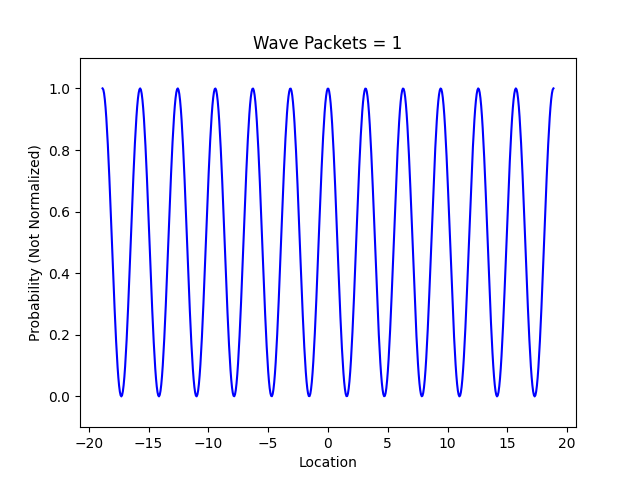

In [2]:
# Cell 2
num_total_waves = 3
plot_waves()


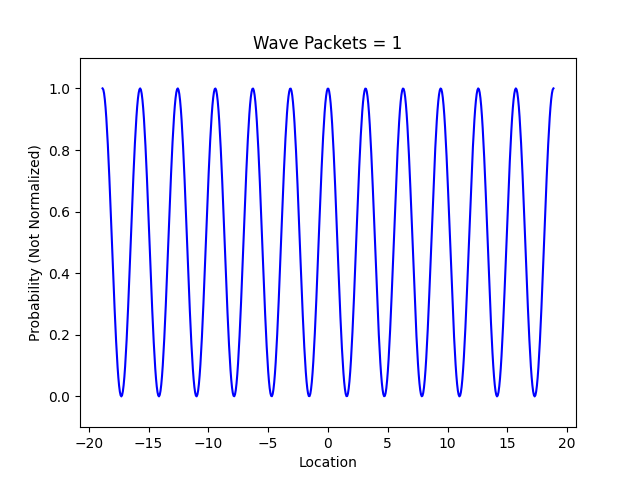

In [3]:
# Cell 3
num_total_waves = 11
plot_waves()


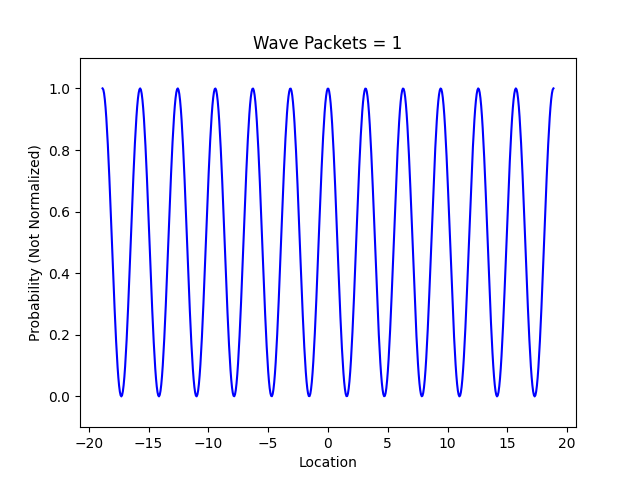

In [5]:
# Cell 4
num_total_waves = 600
plot_waves()
